# PIPELINE WITH MODEL 4, DATASET V3 (https://universe.roboflow.com/sidsproject/back_stomach_123_merged-xxmxb/dataset/1), DIFFERENT TYPES OF EMBEDDINGS

## PIPELINE
### 1. load model face_detection
### 2. create embeddings
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

## 1. load the model face_detection
Step 1 is the same for each pipeline, so we do it once at the beginning.

**Import dependencies**

In [37]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import os
import ipynbname

from retrieval import ImageRetrieval
from classifier import Classifier
import file_manager

project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path = f"{project_dir}/models/4.weights/best.pt"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [38]:
emb_builder = EmbeddingBuilder(model_path, image_dataset_path, "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


---
# EMBEDDING flag

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [39]:
embeddings = emb_builder.embedding_flags()


Creation of flags features embedding------------------------------------------------------
4158 embedding created
------------------------------------------------------------------------------------------


In [40]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,1


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


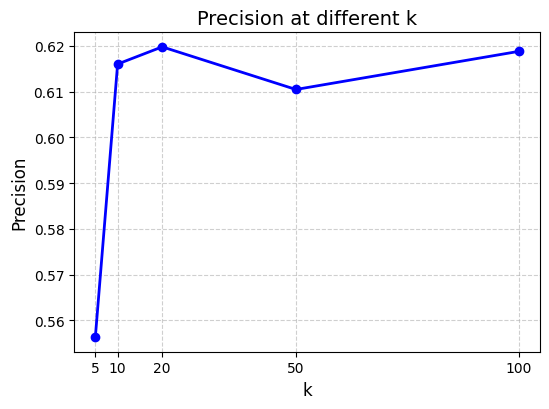


Recall at R-------------------------------------------------------------------------------
0.5850676155785931

Silhouette score--------------------------------------------------------------------------


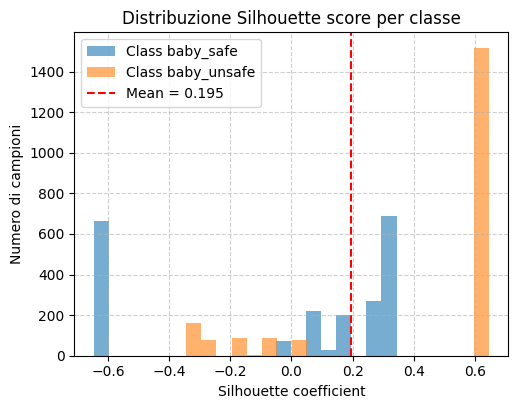


Embeddings distributions------------------------------------------------------------------


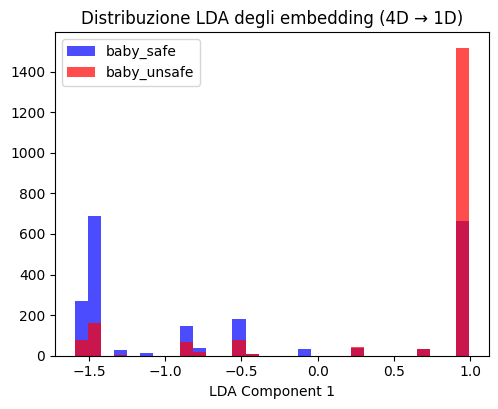

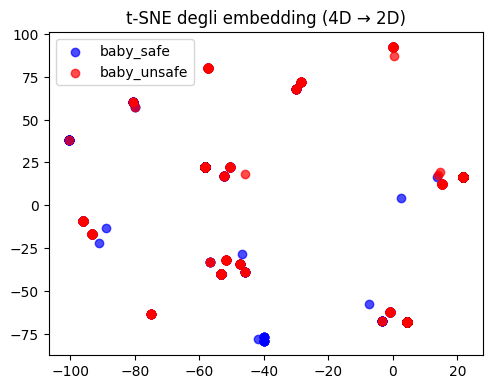

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


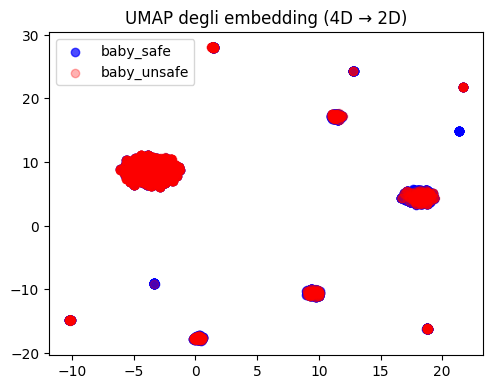

In [41]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


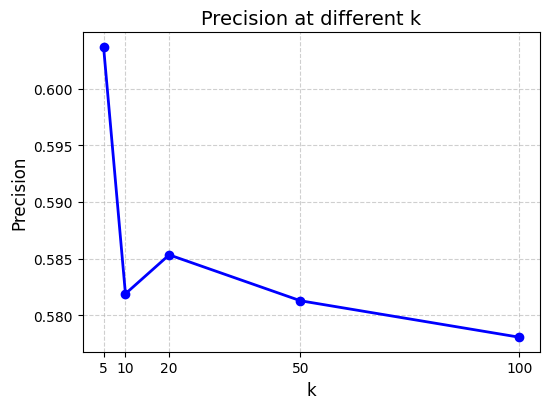


Recall at R-------------------------------------------------------------------------------
0.5428515074643188

Silhouette score--------------------------------------------------------------------------


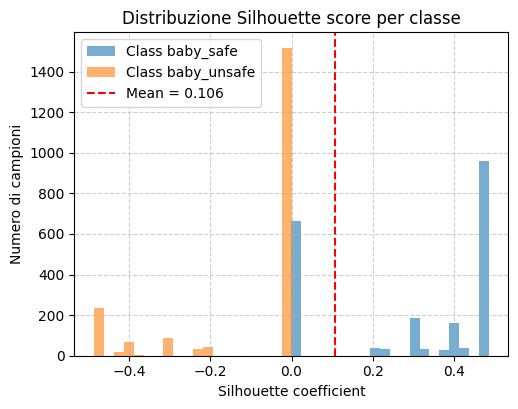


Embeddings distributions------------------------------------------------------------------


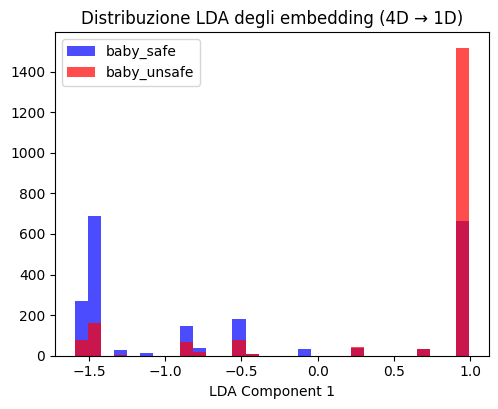

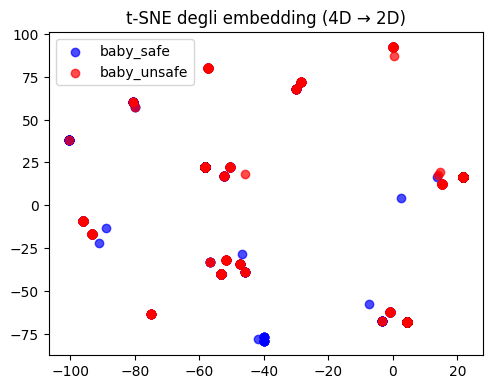

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


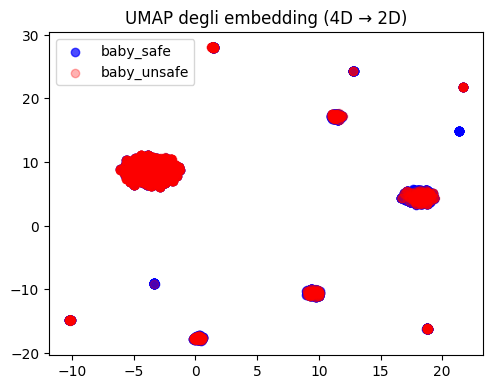

In [42]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


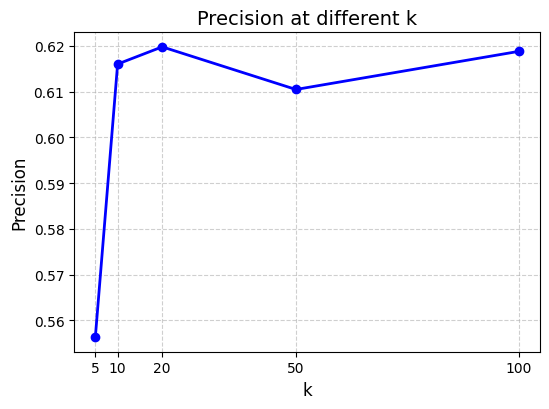


Recall at R-------------------------------------------------------------------------------
0.5850676155785931

Silhouette score--------------------------------------------------------------------------


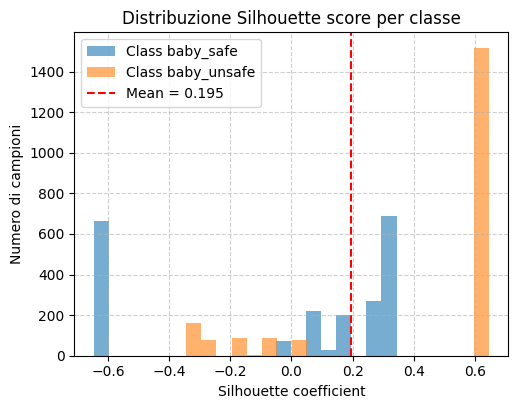


Embeddings distributions------------------------------------------------------------------


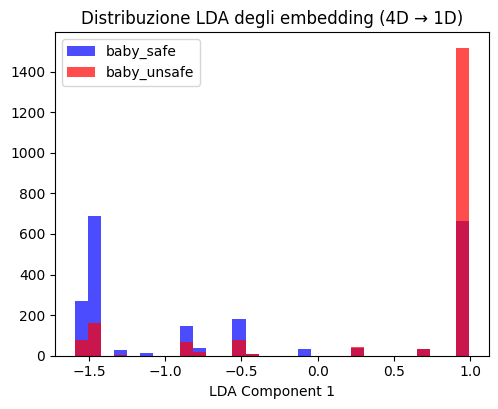

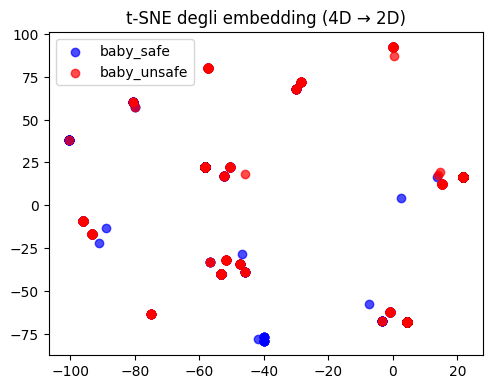

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


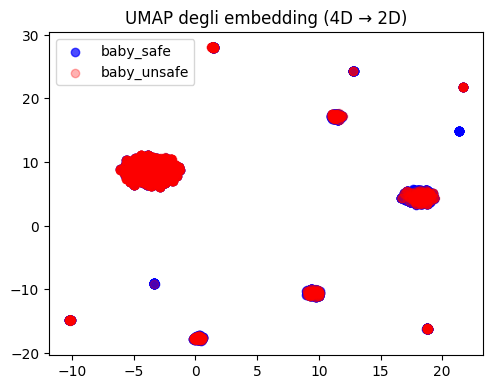

In [43]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


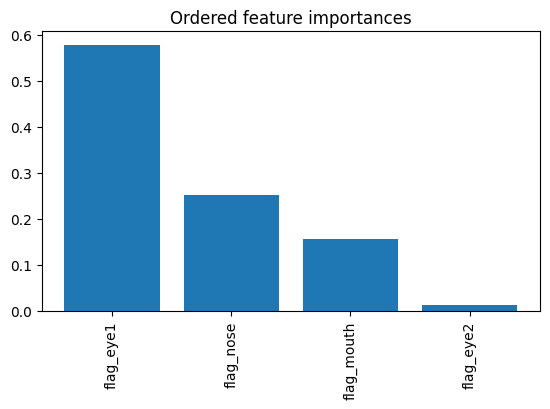

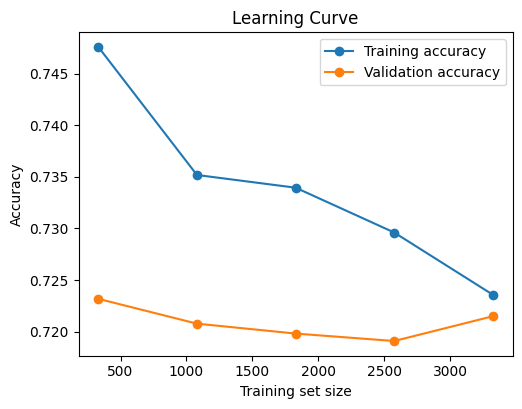


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.64      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.71       832
   macro avg       0.72      0.71      0.71       832
weighted avg       0.72      0.71      0.71       832

Confusion matrix---------------------------------------


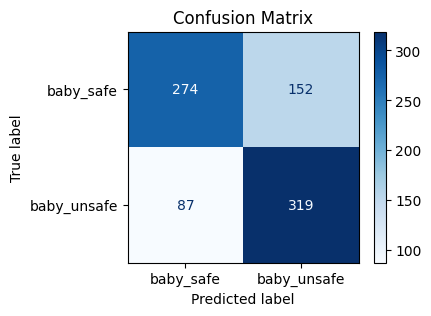

In [44]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [45]:
embeddings = emb_builder.embedding_all_features()


Creation of all features embedding--------------------------------------------------------
4158 embedding created
------------------------------------------------------------------------------------------


In [46]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,-1.000000,-1.00000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.84086,0.27549,0.060125,122.830696,147.334481,0.085138


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


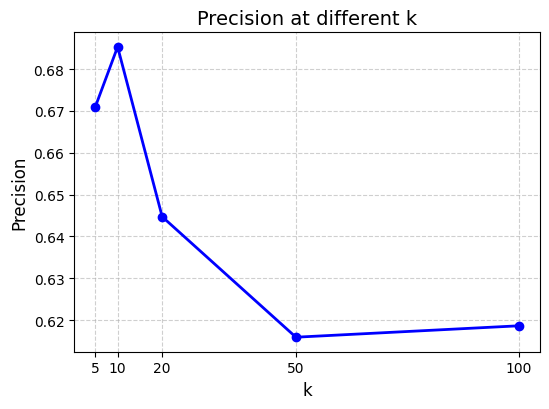


Recall at R-------------------------------------------------------------------------------
0.5546667579984337

Silhouette score--------------------------------------------------------------------------


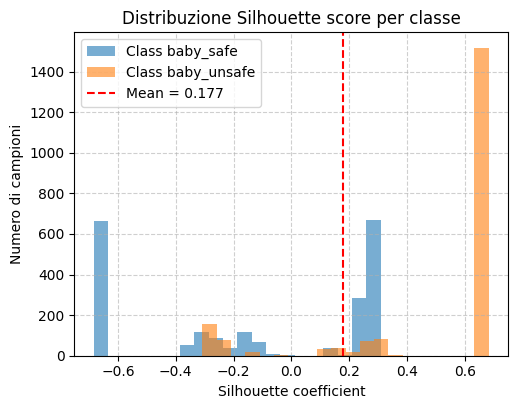


Embeddings distributions------------------------------------------------------------------


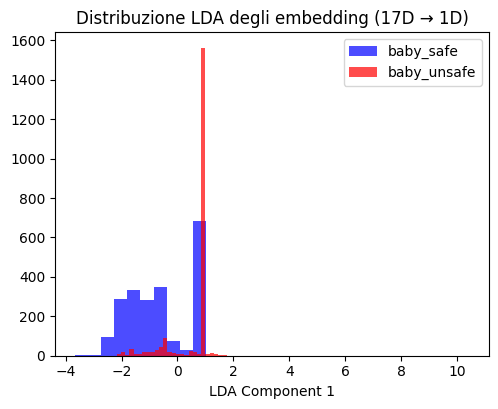

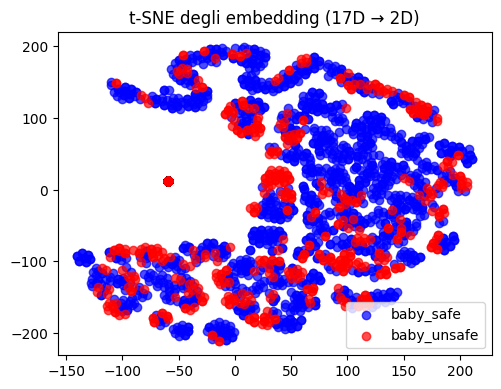

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


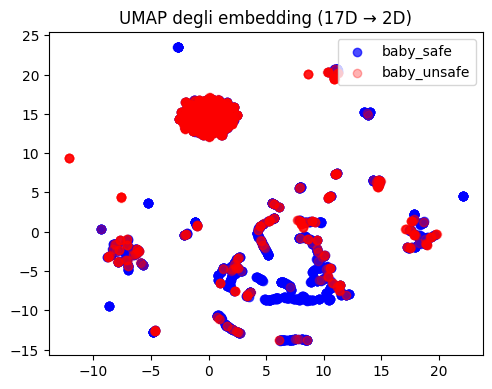

In [47]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


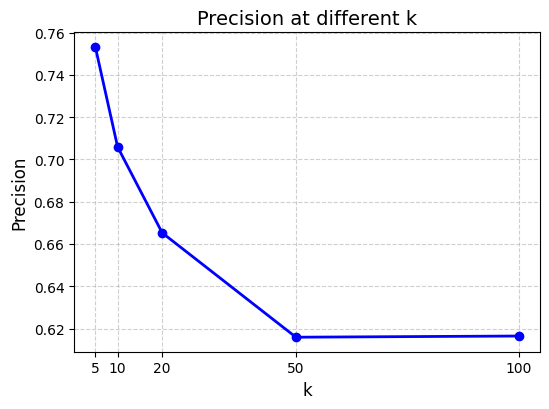


Recall at R-------------------------------------------------------------------------------
0.5537950154830042

Silhouette score--------------------------------------------------------------------------


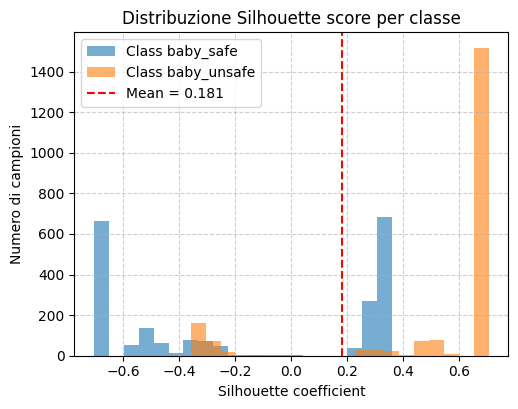


Embeddings distributions------------------------------------------------------------------


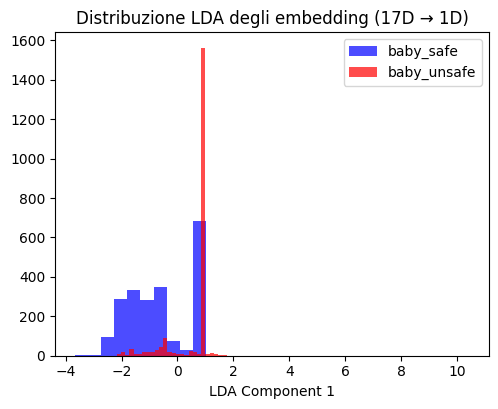

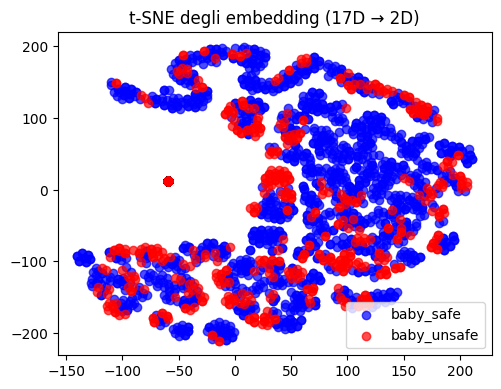

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


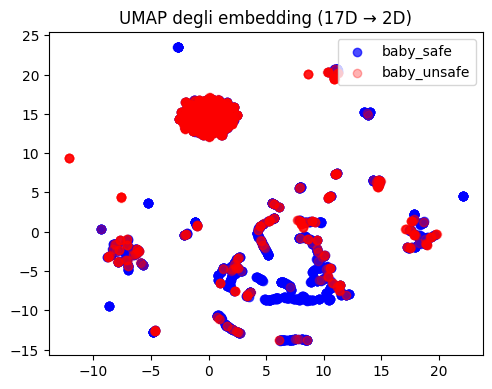

In [48]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


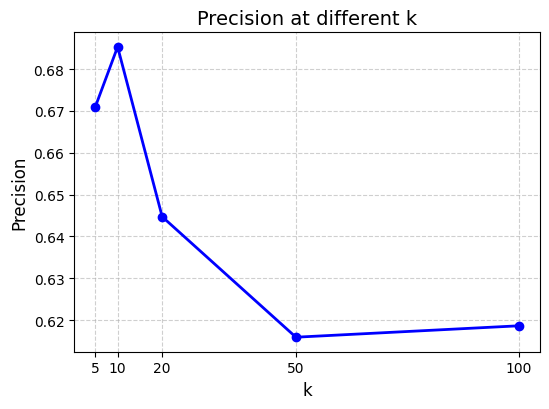


Recall at R-------------------------------------------------------------------------------
0.5546667579984337

Silhouette score--------------------------------------------------------------------------


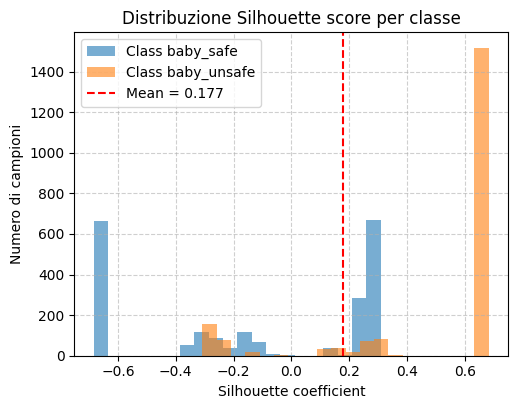


Embeddings distributions------------------------------------------------------------------


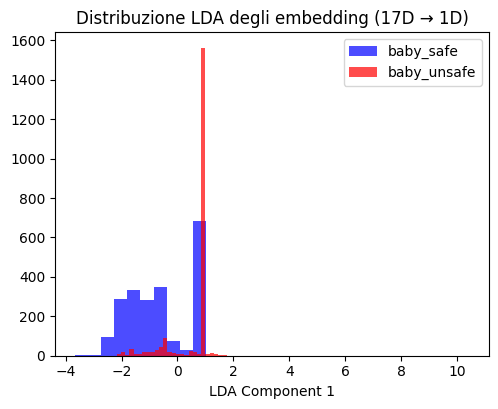

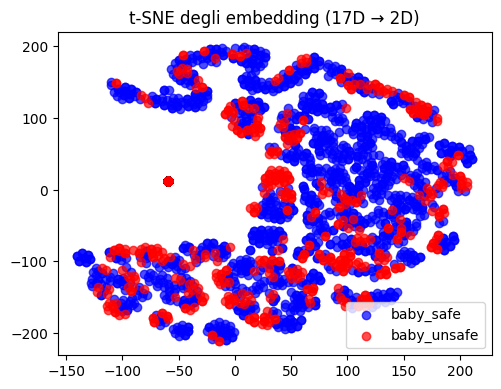

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


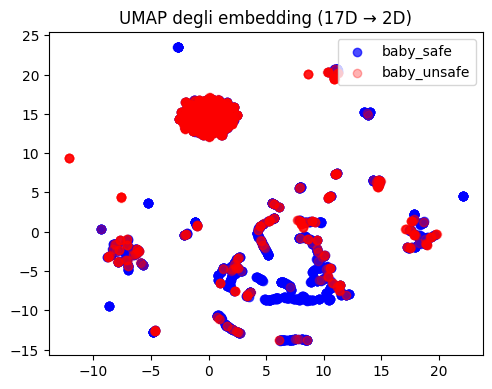

In [49]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


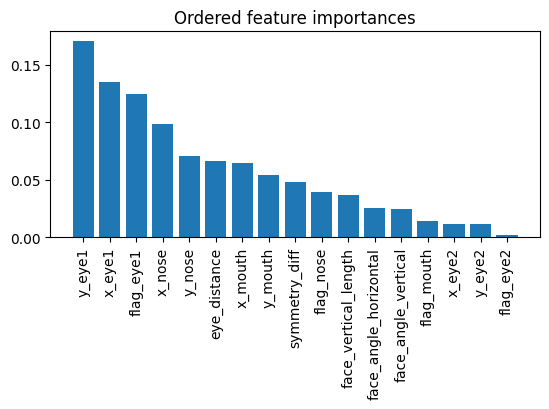

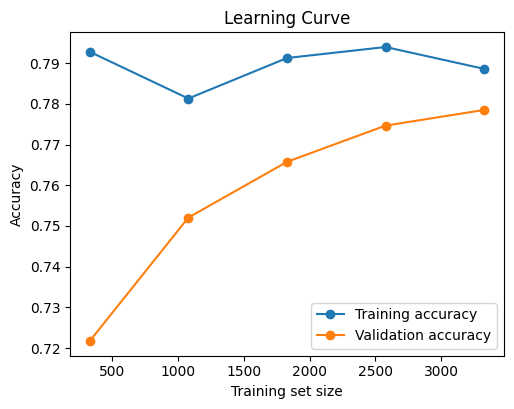


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.67      0.75       426
 baby_unsafe       0.72      0.87      0.79       406

    accuracy                           0.77       832
   macro avg       0.78      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


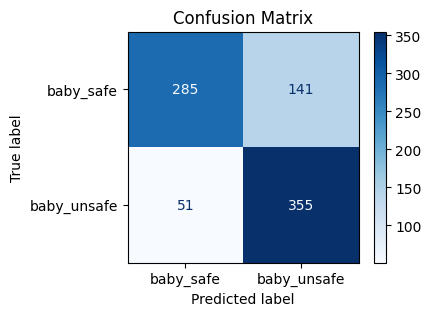

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


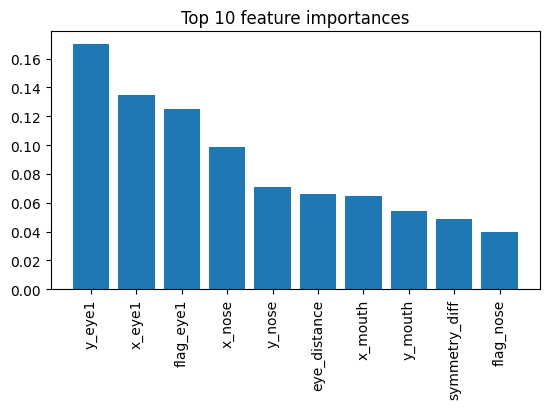

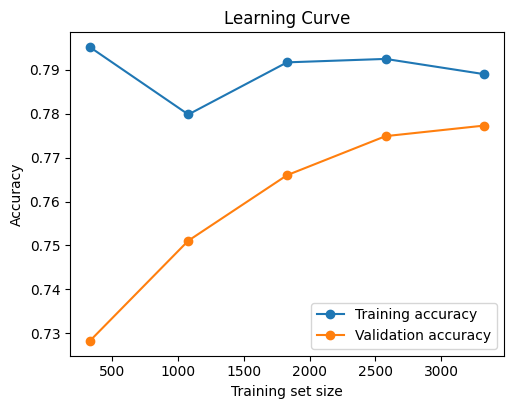


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.85      0.67      0.75       426
 baby_unsafe       0.72      0.87      0.79       406

    accuracy                           0.77       832
   macro avg       0.78      0.77      0.77       832
weighted avg       0.78      0.77      0.77       832

Confusion matrix---------------------------------------


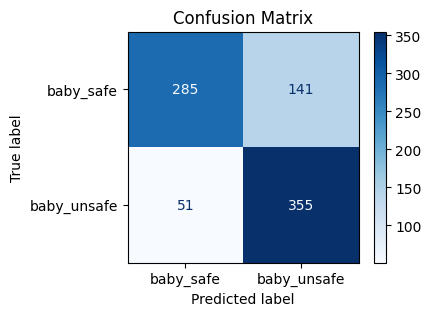

In [50]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

---
# EMBEDDINGS all features normalized

---

## 2. Extract embeddings from dataset

**Create embeddings**

In [51]:
embeddings = emb_builder.embedding_all_features_norm()


Creation of all features embedding--------------------------------------------------------
FINISHED: 4158 embedding created


In [52]:
embeddings.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,x_mouth_norm,y_mouth_norm,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration
0,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-7.346064,-3.560087,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.292278
1,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.519790,-1.998541,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.395011
2,0,0,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
3,1,0,1,0,0.199751,0.875817,-1.000000,-1.000000,0.246237,0.891980,...,-6.005907,-1.195665,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.837183
4,1,1,1,1,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.814792,1.258686,0.27549,0.685025,0.060125,0.090708,122.830696,147.334481,0.085138,1.648186


## 3. Retrieval to evaluate embedding goodness

Precision at different k:-----------------------------------------------------------------


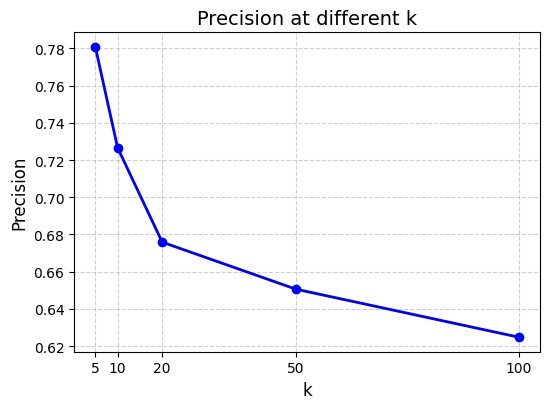


Recall at R-------------------------------------------------------------------------------
0.5498375106937107

Silhouette score--------------------------------------------------------------------------


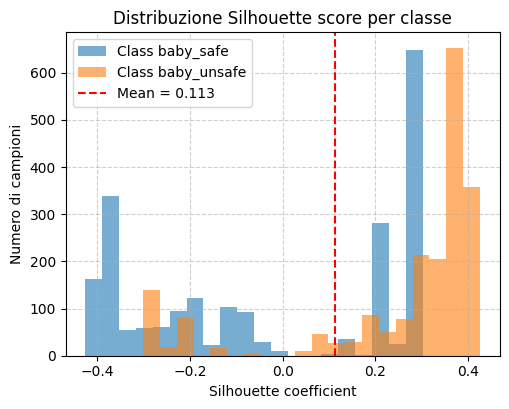


Embeddings distributions------------------------------------------------------------------


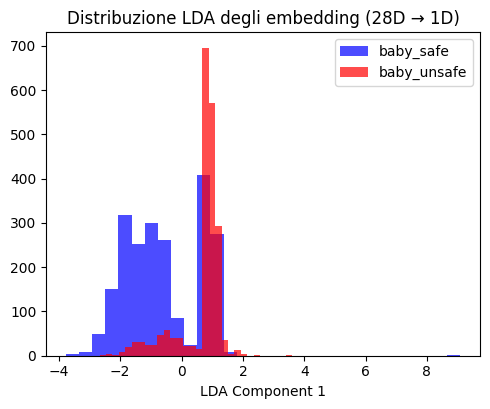

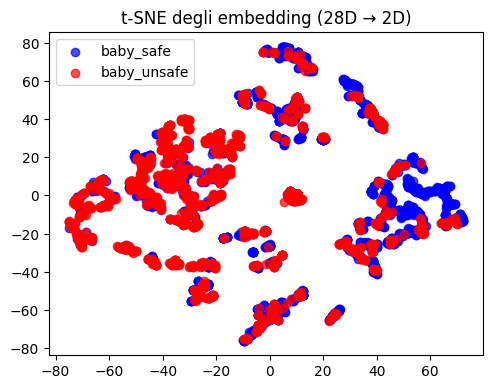

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


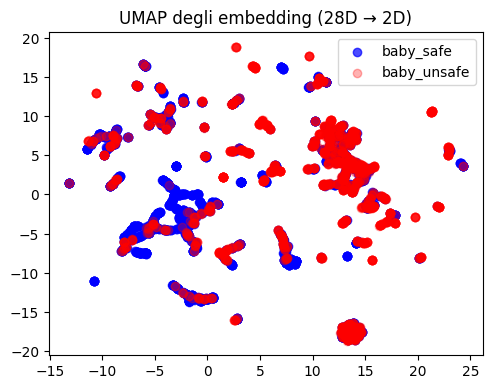

In [53]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, image_dataset_path, emb_builder.classes_bs)
ret.report("euclidean")

Precision at different k:-----------------------------------------------------------------


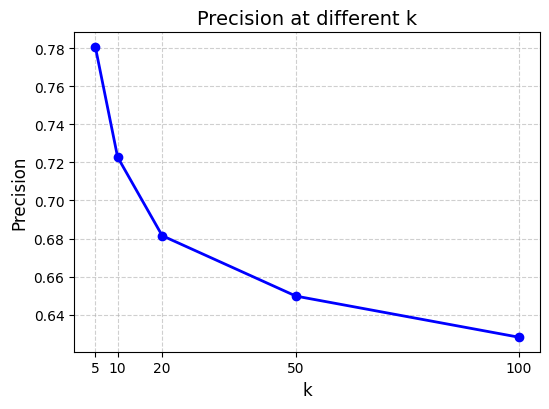


Recall at R-------------------------------------------------------------------------------
0.5497312241944039

Silhouette score--------------------------------------------------------------------------


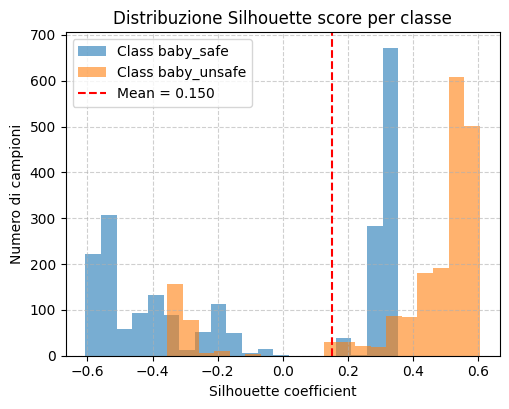


Embeddings distributions------------------------------------------------------------------


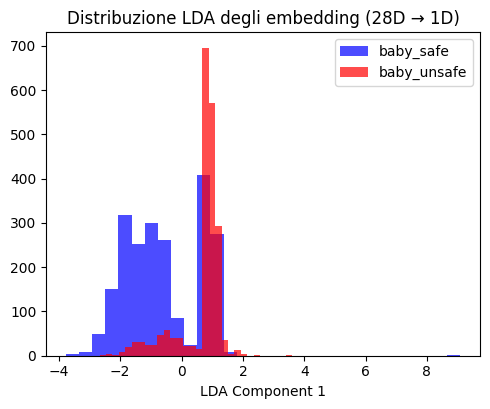

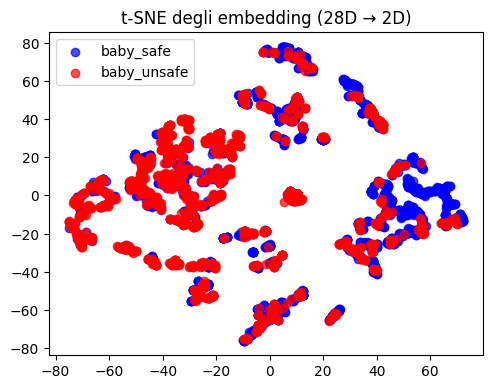

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


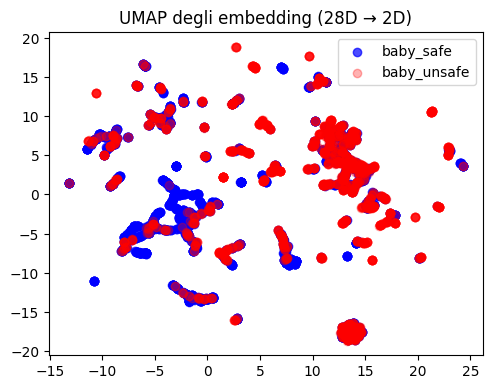

In [54]:
ret.report("cosine")

Precision at different k:-----------------------------------------------------------------


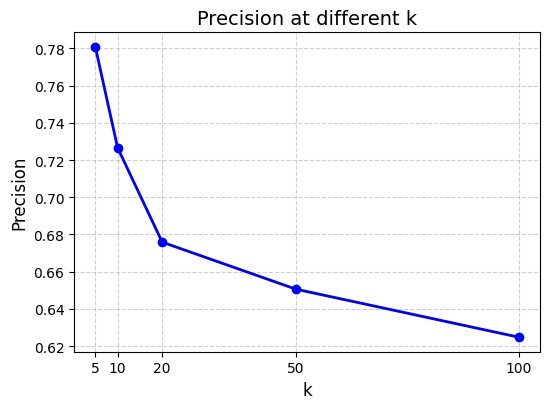


Recall at R-------------------------------------------------------------------------------
0.5498375106937107

Silhouette score--------------------------------------------------------------------------


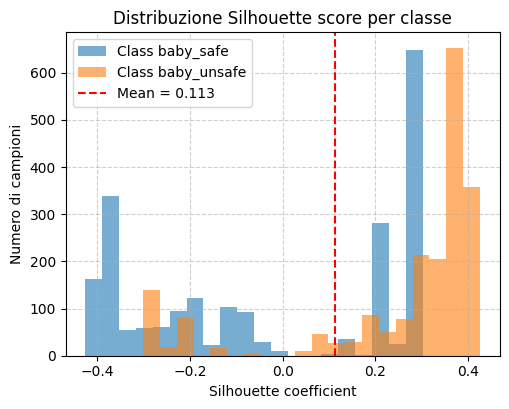


Embeddings distributions------------------------------------------------------------------


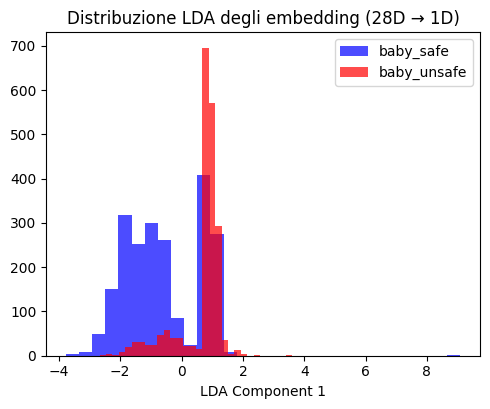

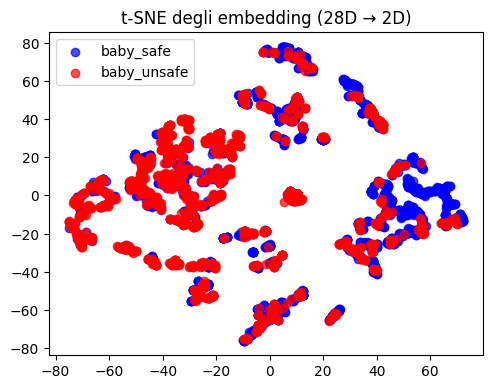

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


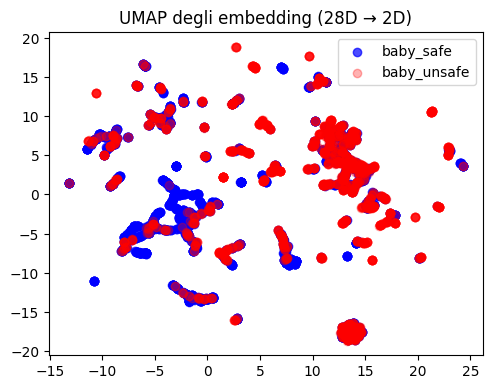

In [55]:
ret.report("minkowski")

## 4. Train model classification

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


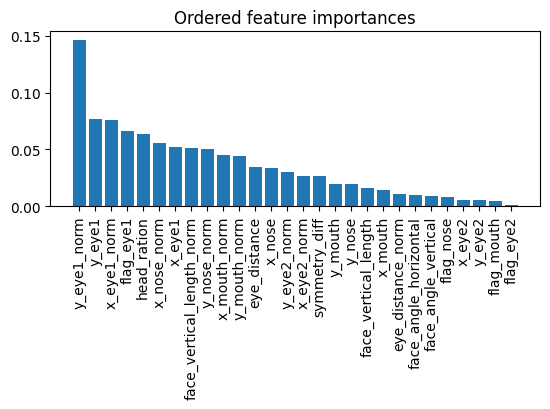

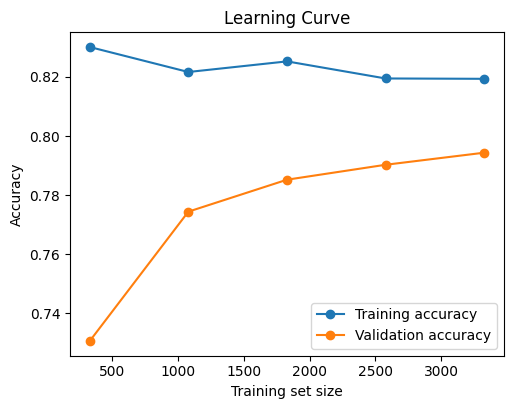


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.68      0.76       426
 baby_unsafe       0.73      0.89      0.80       406

    accuracy                           0.78       832
   macro avg       0.80      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


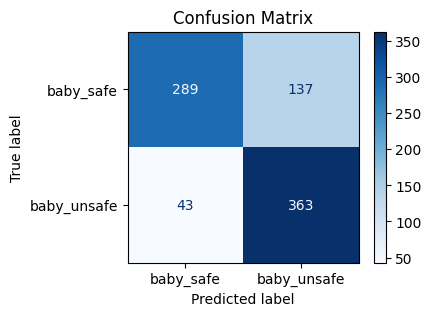

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


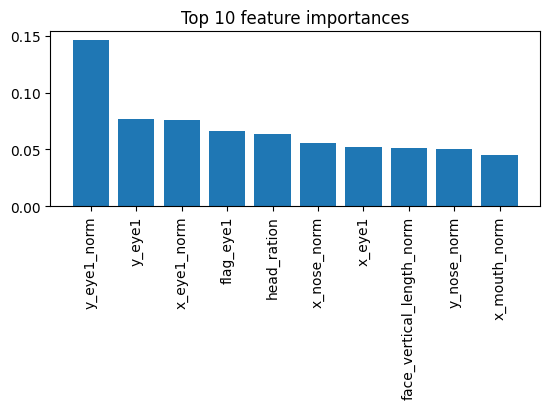

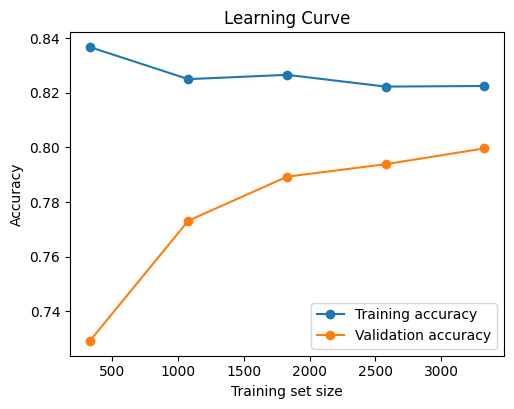


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.67      0.76       426
 baby_unsafe       0.72      0.90      0.80       406

    accuracy                           0.78       832
   macro avg       0.80      0.79      0.78       832
weighted avg       0.80      0.78      0.78       832

Confusion matrix---------------------------------------


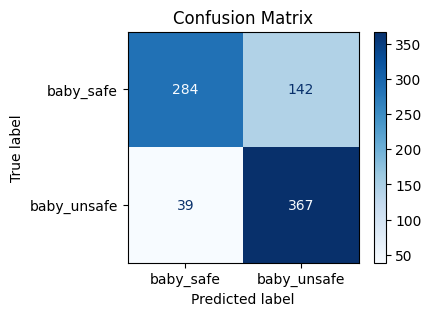

In [56]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs)
clf.random_forest()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


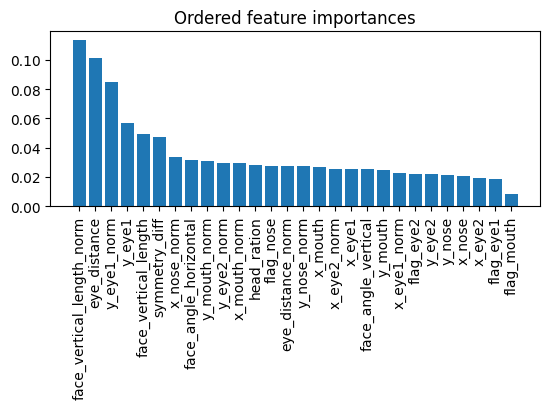

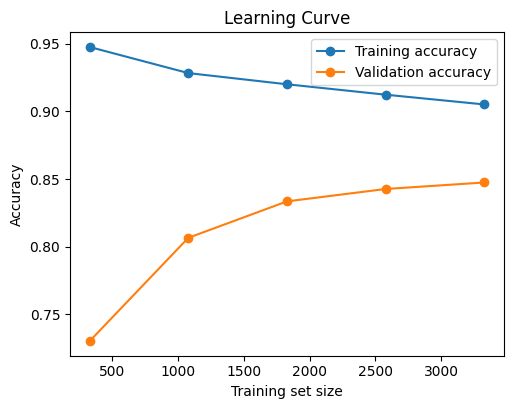


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.88      0.78      0.83       426
 baby_unsafe       0.80      0.89      0.84       406

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.84      0.84      0.83       832

Confusion matrix---------------------------------------


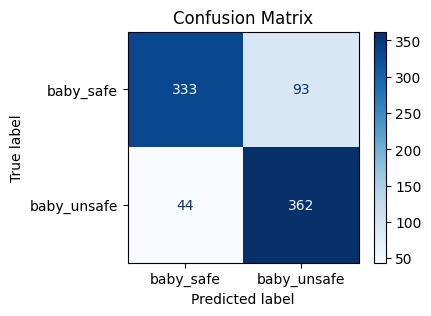

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


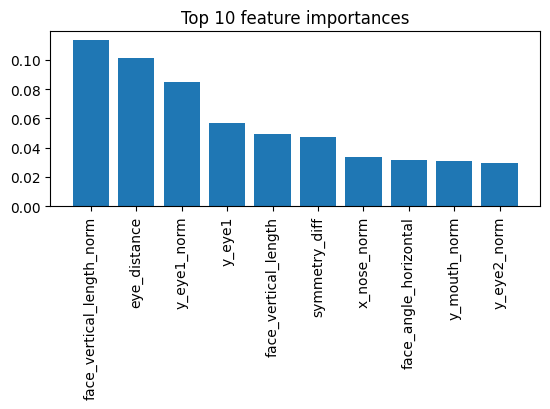

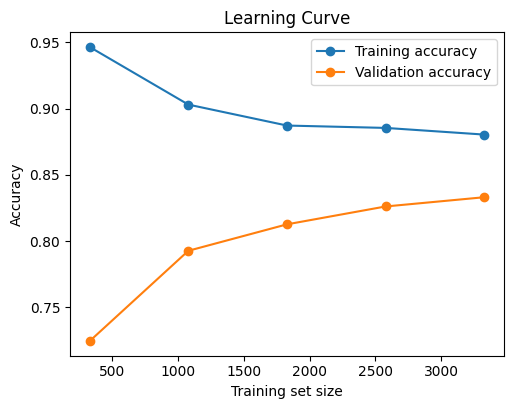


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.87      0.76      0.81       426
 baby_unsafe       0.78      0.88      0.83       406

    accuracy                           0.82       832
   macro avg       0.82      0.82      0.82       832
weighted avg       0.82      0.82      0.82       832

Confusion matrix---------------------------------------


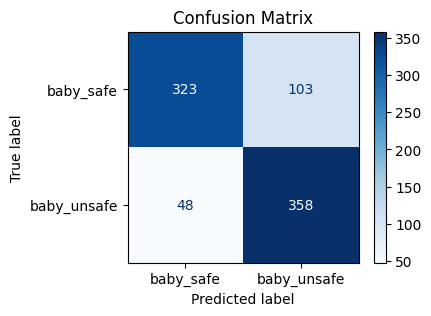

In [57]:
clf.XGBC()

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


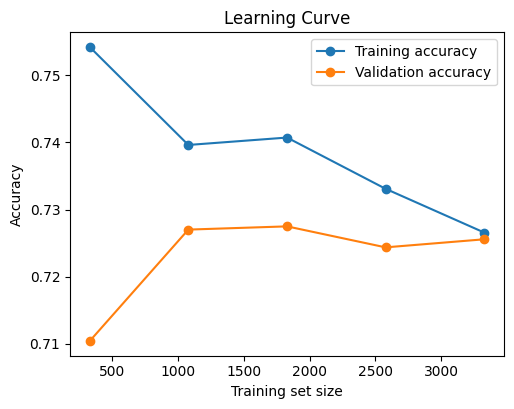


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.76      0.65      0.70       426
 baby_unsafe       0.68      0.79      0.73       406

    accuracy                           0.72       832
   macro avg       0.72      0.72      0.72       832
weighted avg       0.72      0.72      0.72       832

Confusion matrix---------------------------------------


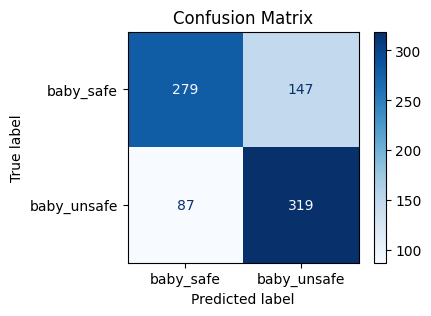

In [58]:
clf.logistic_regression()

## Save notebook

In [59]:
file_manager.save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline_terry/pipeline_dataset_v3.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[WARNING] Could not parse YAML metadata at line 7 column 1: not an object
[NbConvertApp] Support files will be in /home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline_terry/reports/pipeline_dataset_v3(2025-08-24)_files/
[NbConvertApp] Writing 69438 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1913345 bytes to /home/terra/Documents/AI_en